In [25]:
import pandas as pd  
# To fetch financial data
import yfinance as yf
# For visualisation              
import matplotlib.pyplot as plt
import ta 
#plt.style.use('seaborn-darkgrid')
%matplotlib inline
# Download the platinum prices
futures_data = yf.download("PL=F", start="2022-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [26]:
pd.DataFrame(futures_data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,978.200012,978.200012,928.700012,953.700012,953.700012,231
2022-01-04,950.900024,975.000000,950.900024,970.400024,970.400024,58
2022-01-05,980.000000,1001.900024,978.799988,1001.900024,1001.900024,37
2022-01-06,964.000000,973.599976,960.500000,960.599976,960.599976,7
2022-01-07,970.200012,970.200012,957.000000,957.000000,957.000000,6
...,...,...,...,...,...,...
2022-12-23,1042.599976,1042.599976,1042.599976,1042.599976,1042.599976,0
2022-12-27,1042.699951,1042.699951,1042.699951,1042.699951,1042.699951,0
2022-12-28,1029.800049,1029.800049,1029.800049,1029.800049,1029.800049,3920


In [27]:
futures_data.index = pd.to_datetime(futures_data.index)

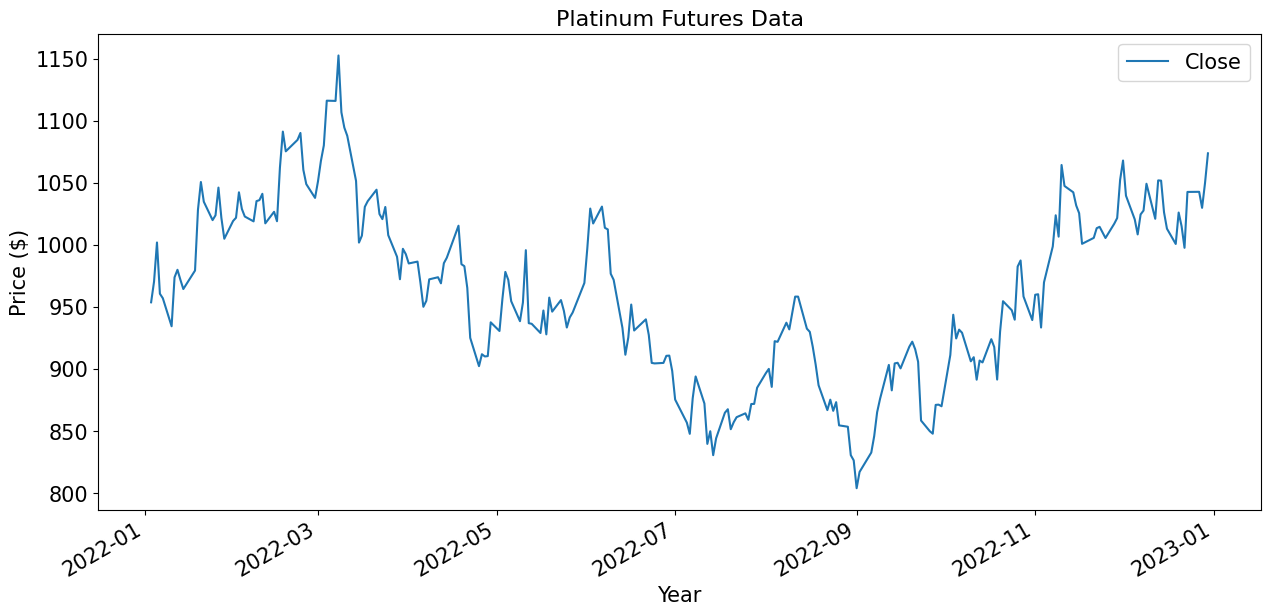

In [28]:
# Plot the close price
plt.figure(figsize=(15, 7))
futures_data['Adj Close'].plot()
              
# Set labels and sizes of the title and axis
plt.title('Platinum Futures Data', fontsize=16)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})
              
# Show the plot    
plt.show()

In [29]:
# Fetch gold and copper futures prices
futures_data = yf.download(["GC=F","HG=F"], start="2022-01-01", end="2022-12-31", group_by= 'tickers')

# Set the index to a datetime type
futures_data.index = pd.to_datetime(futures_data.index)

# Display the last five rows
futures_data.tail()

[*********************100%***********************]  2 of 2 completed


Ticker                       HG=F                                           \
Price                        Open    High     Low   Close Adj Close Volume   
Date                                                                         
2022-12-23 00:00:00+00:00  3.7835  3.8110  3.7600  3.8030    3.8030    370   
2022-12-27 00:00:00+00:00  3.8640  3.9280  3.8335  3.8335    3.8335    380   
2022-12-28 00:00:00+00:00  3.8420  3.8420  3.8190  3.8320    3.8320    550   
2022-12-29 00:00:00+00:00  3.8310  3.8425  3.8090  3.8210    3.8210    723   
2022-12-30 00:00:00+00:00  3.8265  3.8315  3.8020  3.8055    3.8055    681   

Ticker                            GC=F                                         \
Price                             Open         High          Low        Close   
Date                                                                            
2022-12-23 00:00:00+00:00  1794.300049  1802.800049  1794.099976  1795.900024   
2022-12-27 00:00:00+00:00  1803.400024  1826.300049  1803.400024  1814.800049   
2022-12-28 00:00:00+00:00  1803.199951  1807.900024  1803.099976  1807.900024   
2022-12-29 00:00:00+00:00  1805.800049  1819.500000  1805.800049  1819.500000   
2022-12-30 00:00:00+00:00  1817.000000  1822.300049  1816.800049  1819.699951   

Ticker                                         
Price                        Adj Close Volume  
Date                                           
2022-12-23 00:00:00+00:00  1795.900024     49  
2022-12-27 00:00:00+00:00  1814.800049     69  
2022-12-28 00:00:00+00:00  1807.900024    434  
2022-12-29 00:00:00+00:00  1819.500000    277  
2022-12-30 00:00:00+00:00  1819.699951     95

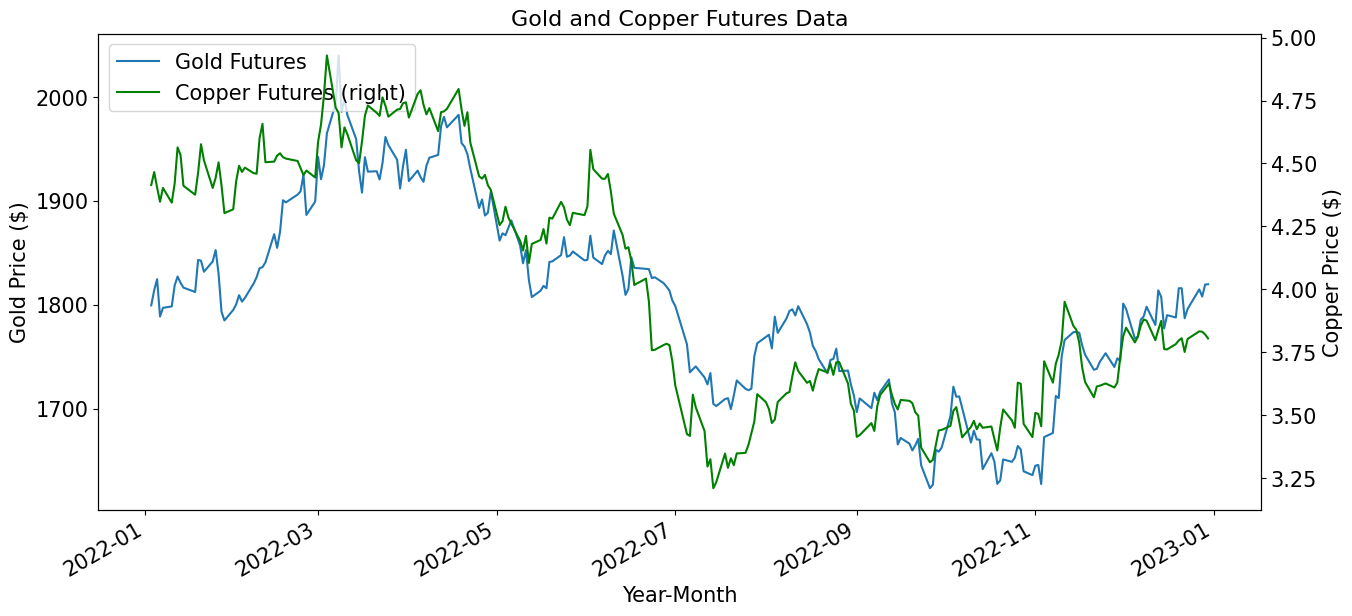

In [30]:
ax = plt.figure(figsize=(15, 7))              
# Plot both futures close prices

              
ax = futures_data['GC=F']['Close'].plot(label='Gold Futures')

              
ax2 = futures_data['HG=F']['Close'].plot(secondary_y=True, color='g',  ax=ax, label='Copper Futures')


# Set the title and axis labels and sizes

              
plt.title('Gold and Copper Futures Data', fontsize=16)
              
ax.set_xlabel('Year-Month', fontsize=15)

            
ax.set_ylabel('Gold Price ($)', fontsize=15)              
ax2.set_ylabel('Copper Price ($)', fontsize=15)

              
ax.tick_params(axis='both', labelsize=15)              
ax2.tick_params(axis='y', labelsize=15)

              
h1, l1 = ax.get_legend_handles_labels()

              
h2, l2 = ax2.get_legend_handles_labels()

              
ax.legend(h1+h2, l1+l2, loc=2, prop={'size': 15})

plt.show()

In [31]:
futures_symbol = "ES=F"

#S&P 500 E-Mini futures contract                
futures_data = yf.download(futures_symbol, start="2024-01-01", end="2024-10-24", interval="1d")

[*********************100%***********************]  1 of 1 completed


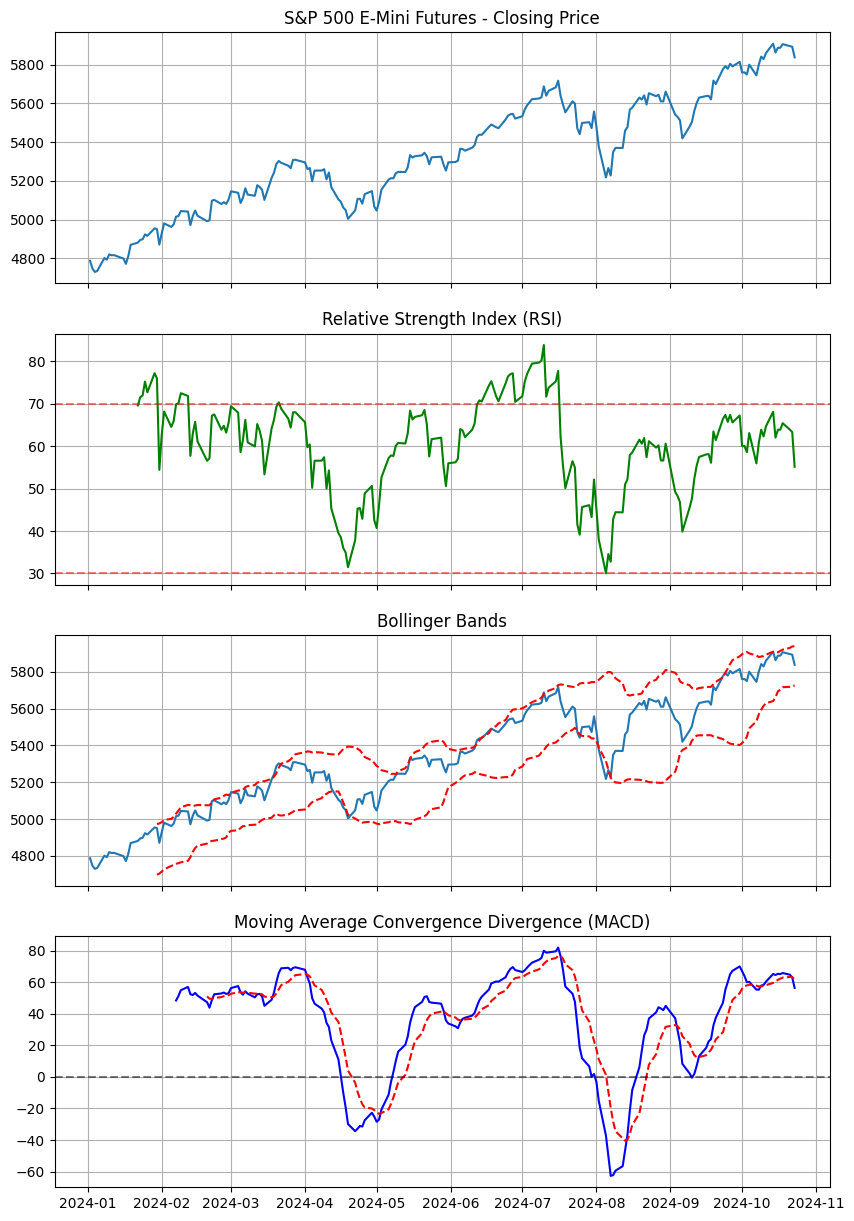

In [32]:
# Calculate RSI
import ta.momentum

futures_data["RSI"] = ta.momentum.RSIIndicator(futures_data["Close"]).rsi()


# Calculate Bollinger Bands                
bbands = ta.volatility.BollingerBands(futures_data["Close"])
futures_data["BB_upper"] = bbands.bollinger_hband()
futures_data["BB_lower"] = bbands.bollinger_lband()

# Calculate MACD
macd = ta.trend.MACD(futures_data["Close"])
futures_data["MACD"] = macd.macd()
futures_data["MACD_signal"] = macd.macd_signal()

# Create subplots for each indicator

                
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

                
# Plot closing price
axes[0].plot(futures_data.index, futures_data["Close"], label="Close")   
axes[0].set_title("S&P 500 E-Mini Futures - Closing Price")     
axes[0].grid()

# Plot RSI
axes[1].plot(futures_data.index, futures_data["RSI"], label="RSI", color="g")         
axes[1].axhline(30, linestyle="--", color="r", alpha=0.5)           
axes[1].axhline(70, linestyle="--", color="r", alpha=0.5)    
axes[1].set_title("Relative Strength Index (RSI)")         
axes[1].grid()

# Plot Bollinger Bands
axes[2].plot(futures_data.index, futures_data["Close"], label="Close")         
axes[2].plot(futures_data.index, futures_data["BB_upper"], label="Upper Bollinger Band", linestyle="--", color="r")      
axes[2].plot(futures_data.index, futures_data["BB_lower"], label="Lower Bollinger Band", linestyle="--", color="r")    
axes[2].set_title("Bollinger Bands")    
axes[2].grid()

# Plot MACD            
axes[3].plot(futures_data.index, futures_data["MACD"], label="MACD", color="b")             
axes[3].plot(futures_data.index, futures_data["MACD_signal"], label="Signal Line", linestyle="--", color="r")             
axes[3].axhline(0, linestyle="--", color="k", alpha=0.5)                
axes[3].set_title("Moving Average Convergence Divergence (MACD)")      
axes[3].grid()